<a href="https://colab.research.google.com/github/rayan-arya/rayan-arya/blob/main/CarCO2Calc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries


In [ ]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




Read the dataset in


In [ ]:
import pandas as pd

def load_car_data(Systems_Car_Data):
  return pd.read_csv(Systems_Car_Data)

Set up dataframe and print first 10 rows

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

car = gc.open('Systems_Car_Data').sheet1

rows = car.get_all_values()
print(rows)

car = pd.DataFrame.from_records(rows)
car.columns = car.iloc[0]
car = car.drop(0)
car.head(10)

[['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'], ['BUICK', 'ENCLAVE', 'SUV - STANDARD', '3.6', '6', 'A6', 'X', '14.3', '9.9', '12.3', '23', '283'], ['BUICK', 'ENCLAVE AWD', 'SUV - STANDARD', '3.6', '6', 'A6', 'X', '14.6', '10.2', '12.6', '22', '290'], ['BUICK', 'ENCORE', 'SUV - SMALL', '1.4', '4', 'AS6', 'X', '9.5', '7.2', '8.5', '33', '196'], ['BUICK', 'ENCORE AWD', 'SUV - SMALL', '1.4', '4', 'AS6', 'X', '10.2', '8', '9.2', '31', '212'], ['BUICK', 'LACROSSE', 'MID-SIZE', '3.6', '6', 'AS6', 'X', '13.7', '8.7', '11.5', '25', '264'], ['BUICK', 'LACROSSE AWD', 'MID-SIZE', '3.6', '6', 'AS6', 'X', '13.7', '8.9', '11.5', '25', '264'], ['BUICK', 'LACROSSE eASSIST', 'MID-SIZE', '2.4', '4', 'AS6', 'X', '9.6', '6.5', '8.2', '34', '189'], ['BUICK', 'REGAL eASSIST', 'MID-SIZE', '2.4', '4', 'A

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
1,BUICK,ENCLAVE,SUV - STANDARD,3.6,6,A6,X,14.3,9.9,12.3,23,283
2,BUICK,ENCLAVE AWD,SUV - STANDARD,3.6,6,A6,X,14.6,10.2,12.6,22,290
3,BUICK,ENCORE,SUV - SMALL,1.4,4,AS6,X,9.5,7.2,8.5,33,196
4,BUICK,ENCORE AWD,SUV - SMALL,1.4,4,AS6,X,10.2,8,9.2,31,212
5,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,X,13.7,8.7,11.5,25,264
6,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,X,13.7,8.9,11.5,25,264
7,BUICK,LACROSSE eASSIST,MID-SIZE,2.4,4,AS6,X,9.6,6.5,8.2,34,189
8,BUICK,REGAL eASSIST,MID-SIZE,2.4,4,AS6,X,9.6,6.5,8.2,34,189
9,BUICK,VERANO,COMPACT,2.4,4,AS6,X,11.3,7.4,9.5,30,218
10,CADILLAC,ATS,COMPACT,2.5,4,AS6,X,10.5,7.2,9,31,207


Prep dataset for split

In [ ]:
cleaned = car.drop(['Make', 'Model', 'Vehicle Class'], axis =1)
cleaned = pd.get_dummies(cleaned, columns=['Transmission','Fuel Type'])

Split aup features & Target

In [ ]:
# Separate features and target
X = cleaned.drop('CO2 Emissions(g/km)', axis=1)
y = cleaned['CO2 Emissions(g/km)']


Test train split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Make & Train model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

See if it works

In [ ]:
print("Training score:", model.score(X_train, y_train))
print("Testing score:", model.score(X_test, y_test))

Training score: 0.9980957289343426
Testing score: 0.9982787670160858


Get coefficients (The coefficients in a linear model represent the relationship between each independent variable and the dependent variable. The magnitude of these coefficients indicates the importance of each feature.



In [ ]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

print(coefficients.sort_values(by='Coefficient', ascending=False))

                                  Coefficient
Fuel Consumption Comb (L/100 km)    11.539215
Fuel Consumption City (L/100 km)     6.051096
Fuel Consumption Hwy (L/100 km)      5.462450
Transmission_AM9                     4.578463
Transmission_A10                     2.597791
Transmission_AS10                    1.418343
Transmission_AM8                     1.183330
Transmission_AS9                     1.087363
Transmission_AS8                     0.927971
Transmission_A9                      0.841948
Transmission_A7                      0.730501
Transmission_AM7                     0.663755
Transmission_A8                      0.489334
Fuel Type_X                          0.429261
Transmission_AV10                    0.423068
Transmission_M7                      0.349549
Transmission_AV7                     0.290654
Cylinders                            0.175673
Engine Size(L)                       0.083471
Transmission_M6                     -0.055366
Fuel Consumption Comb (mpg)       

Plot of feature importance

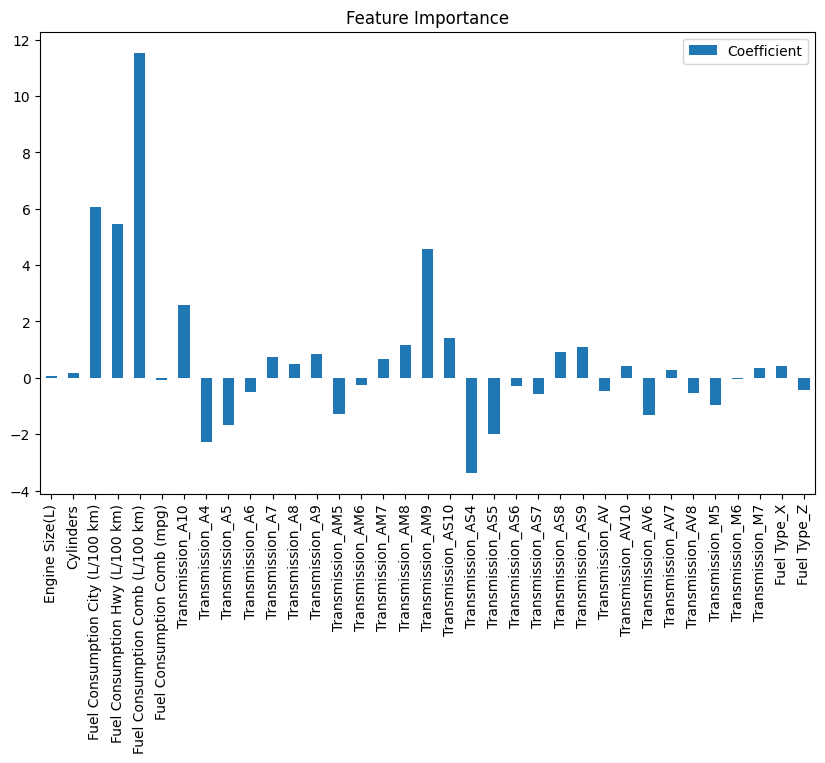

In [ ]:
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()


Ways to reduce Fuel consumption:
- Drive smoothly
  - basically no rapid accel/decel
  - no aggressive driving
- Maintain highway speed using cruise control
- Sparingly use AC
- Avoid Traffic
- Reduce weight of car